In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('pen_based_handwritten.csv')

In [102]:
# Display the first few rows
print(data.head())

   88   92    2   99   16   66   94   37   70    0    0.1   24   42   65  100  \
0  80  100   18   98   60   66  100   29   42    0      0   23   42   61   56   
1   0   94    9   57   20   19    7    0   20   36     70   68  100  100   18   
2  95   82   71  100   27   77   77   73  100   80     93   42   56   13    0   
3  68  100    6   88   47   75   87   82   85   56    100   29   75    6    0   
5  40  100    0   81   15   58  100   57   47   87     50   88   40   42   36   

   100.1   8  
0     98   8  
1     92   8  
2      0   9  
3      0   9  
5      0   4  


In [104]:
# Display the last few rows
print(data.tail())

      88   92    2   99   16   66   94   37   70    0    0.1   24   42   65  \
3492  36  100   24   70    0   38   49   33   95   47     87   55   96   21   
3493  16   75   41  100   52   64   32   27    0    0     21    9   62    2   
3494  56  100   27   79    0   39   12    0   66   15    100   51   93   93   
3495  19  100    0   61    3   23   48    0   97   27    100   66   62   97   
3496  38  100   37   81   12   55    0   28   52   27    100   42   86   26   

      100  100.1   8  
3492  100      0   4  
3493  100     14   2  
3494   38     93   0  
3495   10     81   0  
3496   65      0   4  


In [106]:
print(data.describe())

                88           92            2           99           16  \
count  3347.000000  3347.000000  3347.000000  3347.000000  3347.000000   
mean     42.428443    86.975500    41.979086    86.939050    46.977891   
std      35.904218    13.356217    26.211691    16.103906    32.414043   
min       0.000000    43.000000     0.000000    38.000000     0.000000   
25%       9.000000    78.000000    23.000000    77.000000    18.000000   
50%      35.000000    90.000000    42.000000    95.000000    49.000000   
75%      76.000000   100.000000    60.000000   100.000000    73.000000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

                66           94           37           70            0  \
count  3347.000000  3347.000000  3347.000000  3347.000000  3347.000000   
mean     67.411114    49.886167    43.917239    55.780699    31.917538   
std      25.095123    30.256700    27.962083    35.029545    26.448256   
min       0.000000     0.000000     0

In [108]:
# Get information about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3347 entries, 0 to 3496
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   88      3347 non-null   int64
 1    92     3347 non-null   int64
 2     2     3347 non-null   int64
 3    99     3347 non-null   int64
 4    16     3347 non-null   int64
 5    66     3347 non-null   int64
 6    94     3347 non-null   int64
 7    37     3347 non-null   int64
 8    70     3347 non-null   int64
 9     0     3347 non-null   int64
 10    0.1   3347 non-null   int64
 11   24     3347 non-null   int64
 12   42     3347 non-null   int64
 13   65     3347 non-null   int64
 14  100     3347 non-null   int64
 15  100.1   3347 non-null   int64
 16   8      3347 non-null   int64
dtypes: int64(17)
memory usage: 470.7 KB
None


In [110]:
# Get the shape of the dataframe
print(data.shape)

(3347, 17)


In [112]:
# Get column names
print(data.columns)

Index(['88', ' 92', '  2', ' 99', ' 16', ' 66', ' 94', ' 37', ' 70', '  0',
       '  0.1', ' 24', ' 42', ' 65', '100', '100.1', ' 8'],
      dtype='object')


In [114]:
# Check for null values
print(data.isnull().sum())

88       0
 92      0
  2      0
 99      0
 16      0
 66      0
 94      0
 37      0
 70      0
  0      0
  0.1    0
 24      0
 42      0
 65      0
100      0
100.1    0
 8       0
dtype: int64


In [116]:
# Check for duplicates
print(data.duplicated().sum())

0


In [132]:
num_columns=data.select_dtypes('number')

<Axes: >

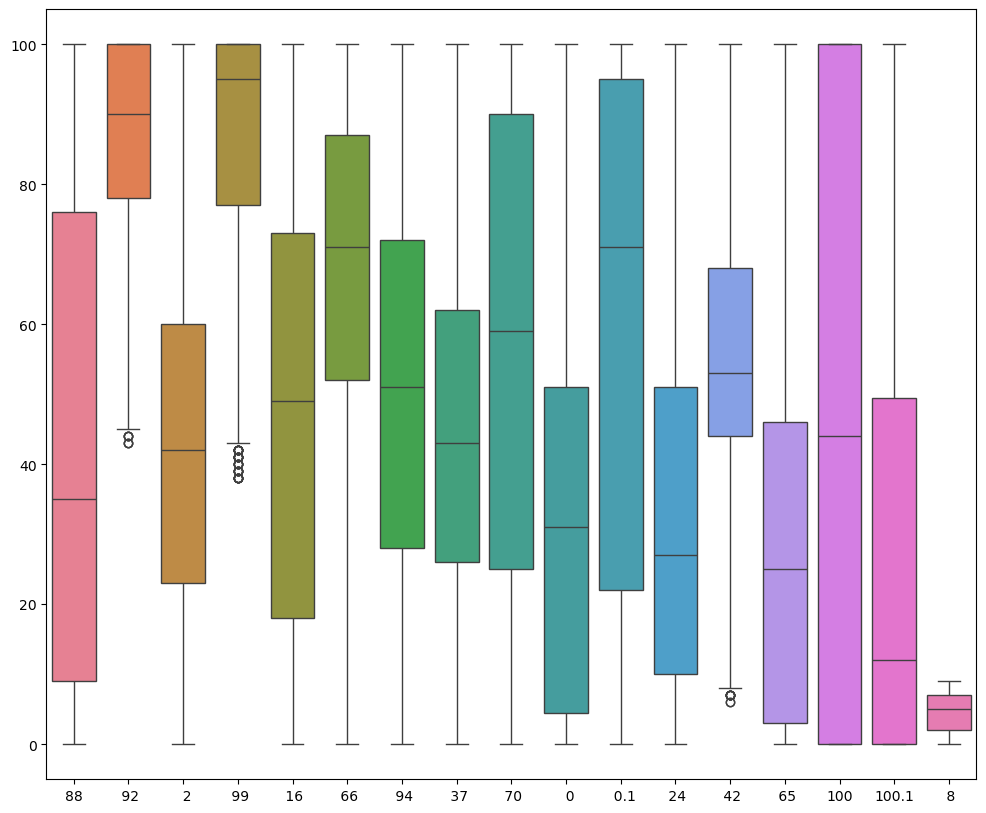

In [126]:
plt.figure(figsize=(12,10))
sns.boxplot(data)

In [136]:
# Calculate Q1, Q3, and IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Check the shape of the new dataset
print("Original shape:", data.shape)
print("Shape after removing outliers:", data_no_outliers.shape)

Original shape: (3347, 17)
Shape after removing outliers: (3290, 17)


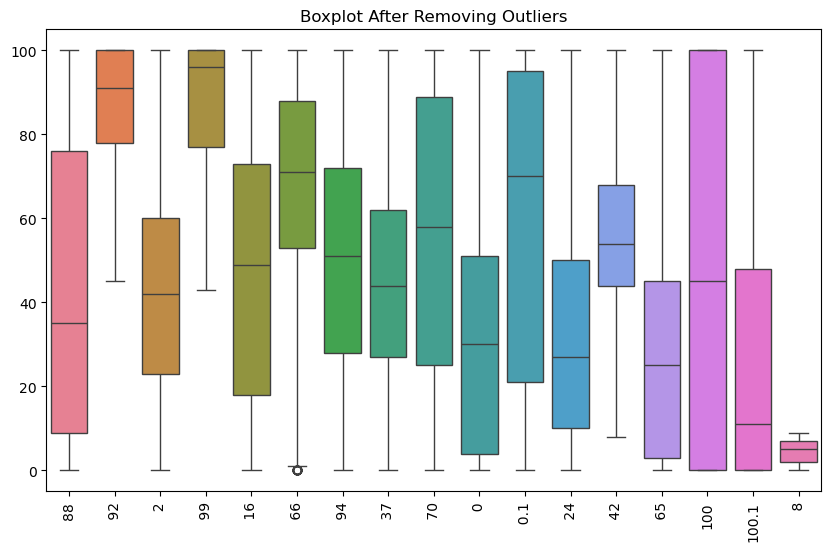

In [144]:
# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers)
plt.title("Boxplot After Removing Outliers")
plt.xticks(rotation=90)  
plt.show()

In [154]:
data_capped=data_no_outliers

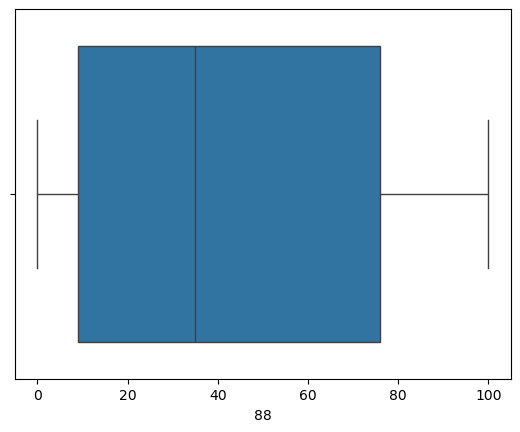

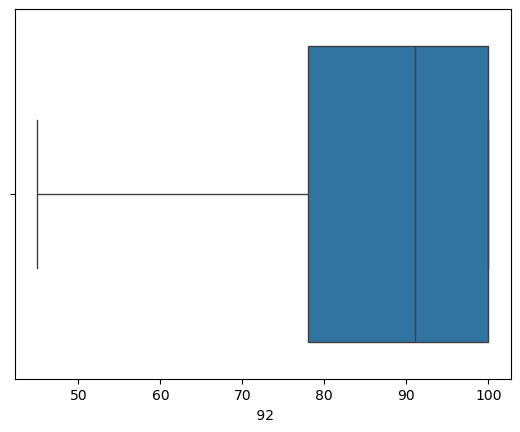

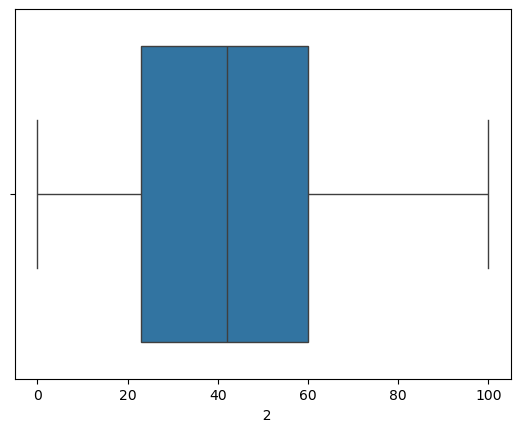

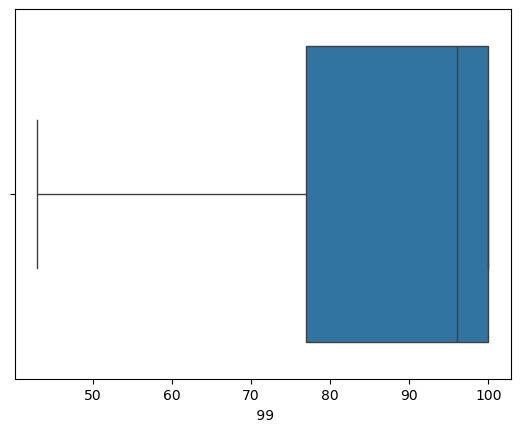

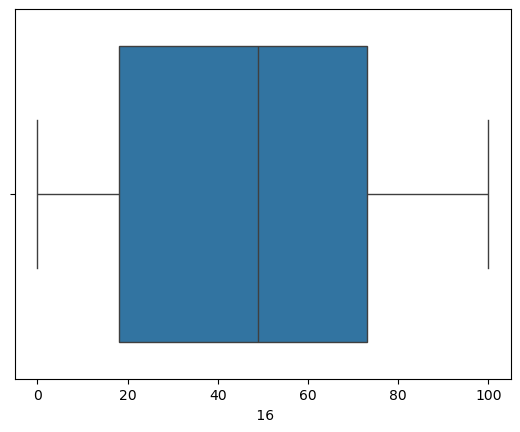

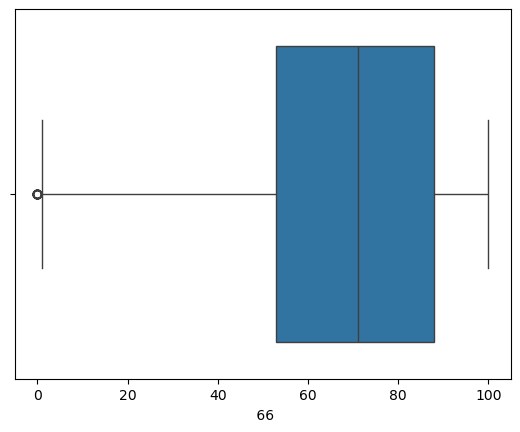

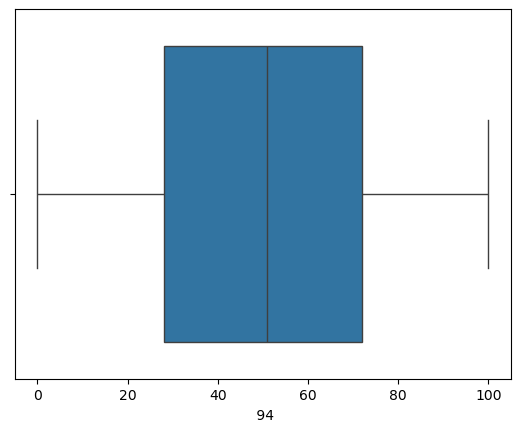

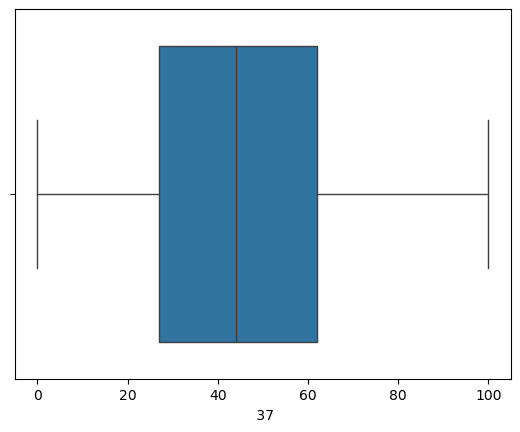

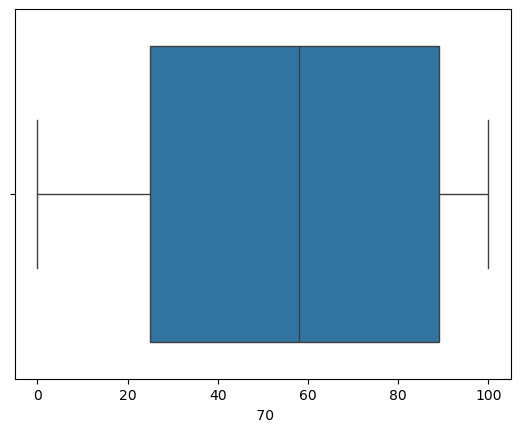

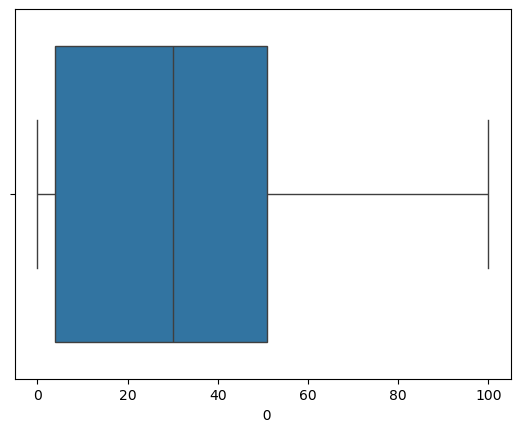

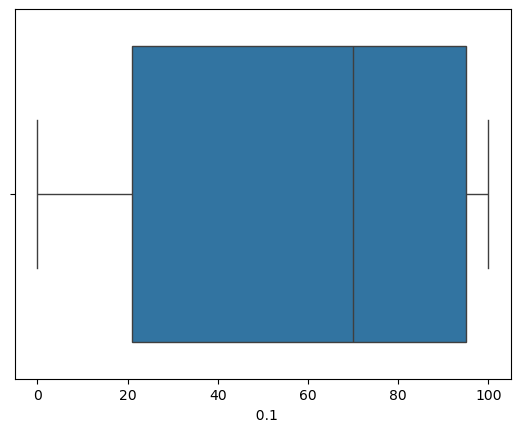

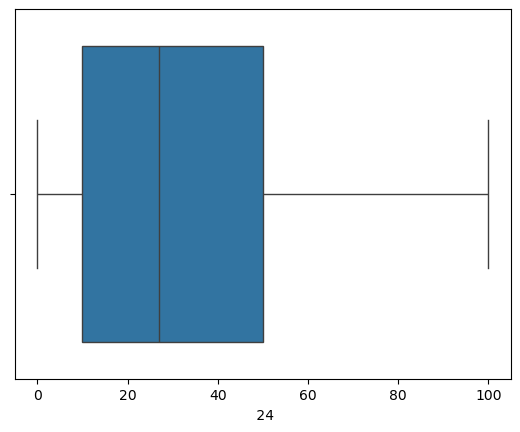

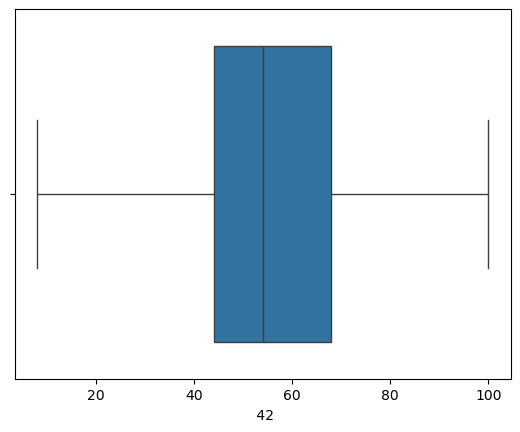

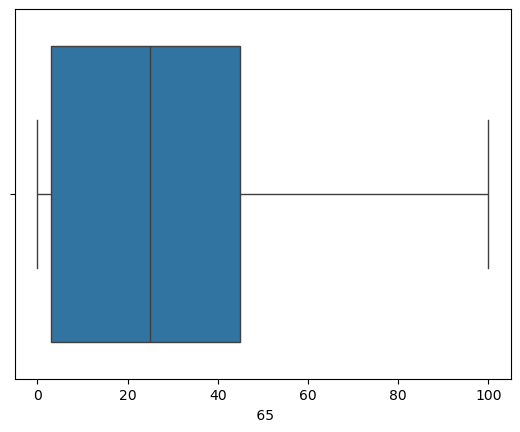

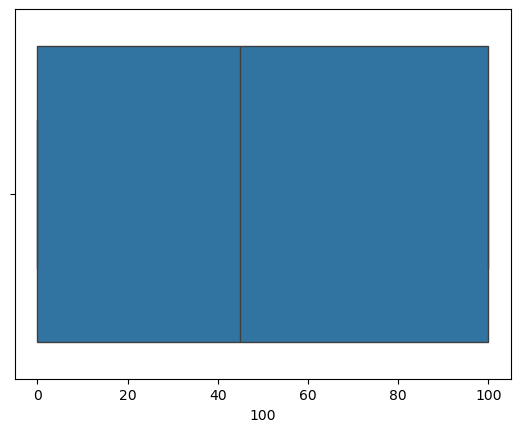

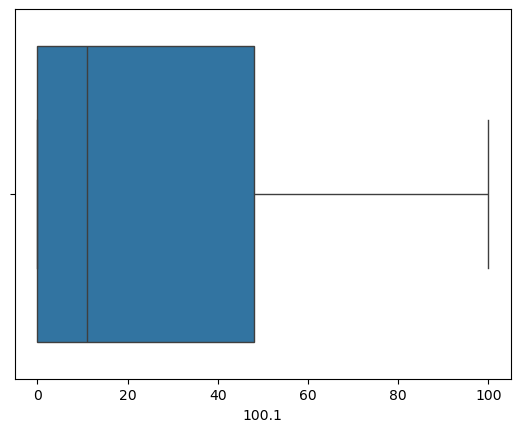

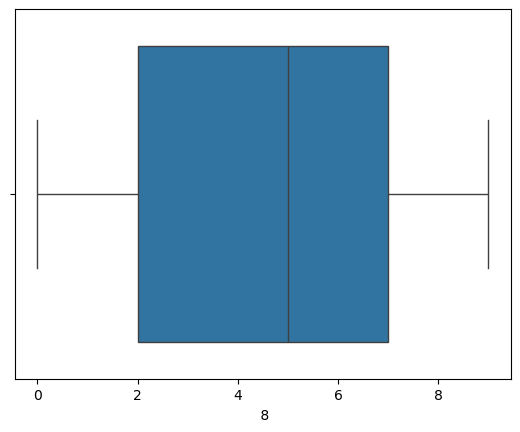

In [156]:
for i in num_columns.columns:
    sns.boxplot(data=data_capped,x=i)
    plt.show()

In [158]:
#identify the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [160]:
# Check skewness
print(X.skew())

88       0.378741
 92     -0.873669
  2      0.186137
 99     -1.082347
 16      0.021893
 66     -0.739757
 94     -0.093611
 37      0.101449
 70     -0.225558
  0      0.353866
  0.1   -0.399916
 24      0.559368
 42      0.331897
 65      0.924417
100      0.077720
100.1    0.949157
dtype: float64


In [162]:
# Apply PowerTransformer to remove skewness
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X)

In [164]:
print(X.skew())

88       0.378741
 92     -0.873669
  2      0.186137
 99     -1.082347
 16      0.021893
 66     -0.739757
 94     -0.093611
 37      0.101449
 70     -0.225558
  0      0.353866
  0.1   -0.399916
 24      0.559368
 42      0.331897
 65      0.924417
100      0.077720
100.1    0.949157
dtype: float64


In [166]:
data.columns = [f'feature_{i}' for i in range(data.shape[1] - 1)] + ['target']

In [170]:
data.corr()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,target
feature_0,1.000000,0.343438,0.295337,0.065881,-0.427063,-0.124069,-0.275238,-0.049891,0.009160,-0.054649,0.206144,-0.096111,0.091901,-0.013203,-0.391748,0.058292,0.354396
feature_1,0.343438,1.000000,-0.094642,-0.080783,-0.314911,-0.430052,-0.219284,-0.377043,0.025113,-0.145124,0.232501,0.200188,0.145124,0.256954,-0.217049,0.192613,0.227378
feature_2,0.295337,-0.094642,1.000000,0.453156,0.410480,0.431907,-0.229169,0.279539,-0.108797,-0.023078,0.042517,-0.448083,-0.162152,-0.451509,-0.274205,-0.305498,0.219963
feature_3,0.065881,-0.080783,0.453156,1.000000,0.250617,0.705601,0.048955,0.405121,-0.084124,-0.159145,-0.198998,-0.725203,-0.176112,-0.694458,0.087994,-0.426407,0.103483
feature_4,-0.427063,-0.314911,0.410480,0.250617,1.000000,0.440455,0.378259,0.277014,-0.186812,-0.017734,-0.295406,-0.317933,-0.362994,-0.269639,0.052787,-0.120174,0.043234
feature_5,-0.124069,-0.430052,0.431907,0.705601,0.440455,1.000000,0.205215,0.812099,0.025297,0.209782,-0.147811,-0.605025,-0.255811,-0.790015,0.085471,-0.616971,0.082120
feature_6,-0.275238,-0.219284,-0.229169,0.048955,0.378259,0.205215,1.000000,0.386262,0.486857,0.344071,-0.117002,0.082994,-0.387487,-0.118169,0.017540,-0.116155,0.051388
feature_7,-0.049891,-0.377043,0.279539,0.405121,0.277014,0.812099,0.386262,1.000000,0.349699,0.649240,0.159963,-0.265100,-0.185039,-0.756665,-0.161376,-0.745207,0.128378
feature_8,0.009160,0.025113,-0.108797,-0.084124,-0.186812,0.025297,0.486857,0.349699,1.000000,0.571069,0.624855,0.282623,-0.096824,-0.122992,-0.431344,-0.280921,-0.045677
feature_9,-0.054649,-0.145124,-0.023078,-0.159145,-0.017734,0.209782,0.344071,0.649240,0.571069,1.000000,0.481141,0.439279,-0.001010,-0.289820,-0.393736,-0.514824,0.041386


In [172]:
correlation_matrix = data.corr()

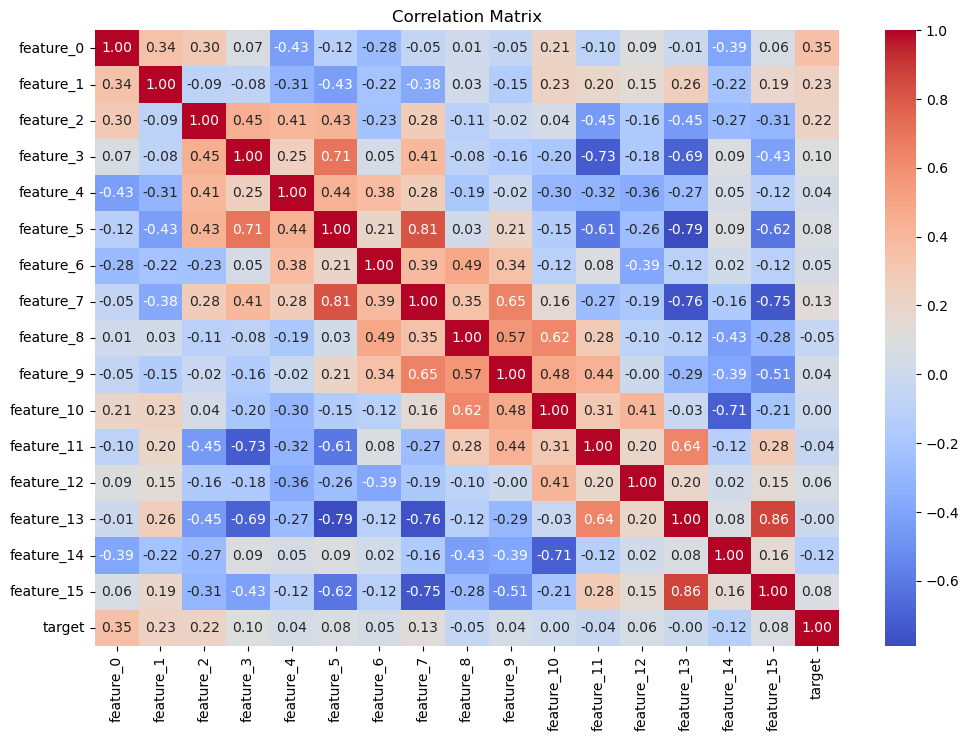

In [174]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [180]:
#  Feature Selection
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X_transformed, y)

In [184]:
# Get the scores and p-values of all features
scores = selector.scores_
p_values = selector.pvalues_

In [188]:
# Create a DataFrame to store feature names, scores, and p-values
feature_scores_df = pd.DataFrame({
    'Feature': X.columns,  
    'Score': scores,
    'P-Value': p_values    # P-values
})

In [192]:
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)
print(feature_scores_df)

Selected Features: Index(['88', ' 92', '  2', ' 99', ' 16', ' 66', ' 94', ' 37', ' 70', '  0',
       '  0.1', ' 24', ' 42', ' 65', '100', '100.1'],
      dtype='object')
   Feature       Score        P-Value
15   100.1  770.617074   0.000000e+00
13      65  727.120700   0.000000e+00
4       16  719.466057   0.000000e+00
7       37  523.413621   0.000000e+00
10     0.1  481.118324   0.000000e+00
0       88  473.872966   0.000000e+00
5       66  447.009386   0.000000e+00
8       70  423.579870   0.000000e+00
9        0  419.932134   0.000000e+00
14     100  410.720624   0.000000e+00
11      24  360.893087   0.000000e+00
1       92  354.500041   0.000000e+00
6       94  253.794510   0.000000e+00
3       99  223.452804   0.000000e+00
2        2  138.925911  4.442233e-223
12      42  113.272275  6.864868e-186


In [196]:
#  Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

In [198]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [200]:
print(f"""
X train shape : {X_train.shape}
X test shape : {X_test.shape} 
y train shape : {y_train.shape}
y test shape : {y_test.shape}
""")


X train shape : (2677, 16)
X test shape : (670, 16) 
y train shape : (2677,)
y test shape : (670,)



In [204]:
#  Model Building
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.95      0.96      0.96        57
           2       1.00      1.00      1.00        85
           3       0.97      1.00      0.98        62
           4       0.99      1.00      0.99        70
           5       0.97      0.94      0.95        62
           6       1.00      1.00      1.00        78
           7       0.98      0.97      0.98        63
           8       1.00      0.97      0.98        60
           9       0.96      0.97      0.97        74

    accuracy                           0.98       670
   macro avg       0.98      0.98      0.98       670
weighted avg       0.98      0.98      0.98       670

[[59  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  1  0  0  1  0  0]
 [ 0  0 85  0  0  0  0  0  0  0]
 [ 0  0  0 62  0  0  0  0  0  0]
 [ 0  0  0  0 70  0  0  0  0  0]
 [ 0  0  0  2  0 58  0  0  0  2]
 [ 0  0  0  0  0  0 78

In [208]:
#  Hyperparameter Tuning 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [209]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


In [210]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Model Evaluation:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.95      0.96      0.96        57
           2       1.00      0.99      0.99        85
           3       1.00      1.00      1.00        62
           4       0.99      1.00      0.99        70
           5       0.98      0.97      0.98        62
           6       1.00      1.00      1.00        78
           7       0.97      0.98      0.98        63
           8       1.00      0.97      0.98        60
           9       0.97      0.99      0.98        74

    accuracy                           0.99       670
   macro avg       0.99      0.99      0.99       670
weighted avg       0.99      0.99      0.99       670

[[59  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  1  0  0  1  0  0]
 [ 0  0 84  0  0  0  0  1  0  0]
 [ 0  0  0 62  0  0  0  0  0  0]
 [ 0  0  0  0 70  0  0  0  0  0]
 [ 0  0  0  0  0 60  0  0  0  2]
 [ 0  0  0  0  0  0 